# Overview datasets


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tqdm.auto as tqdm

## Animals Dataset

In [73]:
df = pd.read_csv("Animals Dataset/data/animals_preapred.zip")

df.head()

,tid,class,t,c1,c2
0,1,D,0,50.1066,3.79665
1,1,D,4,50.1045,3.79455
2,1,D,7,50.1111,3.79845
3,1,D,9,50.1072,3.79845
4,1,D,15,50.1132,3.79965


In [74]:
df[["delta_t", "delta c1", "delta c2"]] = df.groupby(by="tid")["t", "c1", "c2"].diff()
df = df.merge(df.groupby(by="tid").size().rename("trajectoryLen").reset_index(), on="tid")

df.head()

<ipython-input-74-d6a7ff786720>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df[["delta_t", "delta c1", "delta c2"]] = df.groupby(by="tid")["t", "c1", "c2"].diff()


,tid,class,t,c1,c2,delta_t,delta c1,delta c2,trajectoryLen
0,1,D,0,50.1066,3.79665,NaN,NaN,NaN,159
1,1,D,4,50.1045,3.79455,4.0,-0.0021,-0.0021,159
2,1,D,7,50.1111,3.79845,3.0,0.0066,0.0039,159
3,1,D,9,50.1072,3.79845,2.0,-0.0039,0.0000,159
4,1,D,15,50.1132,3.79965,6.0,0.0060,0.0012,159


In [75]:
df.describe()

,tid,t,c1,c2,delta_t,delta c1,delta c2,trajectoryLen
count,14990.000000,14990.000000,14990.000000,14990.000000,14888.000000,14888.000000,14888.000000,14990.000000
mean,47.319480,330.046831,50.125104,3.772156,3.748119,-0.000010,-0.000015,173.288993
std,27.877163,213.205480,0.033747,0.018422,6.235011,0.004216,0.003511,56.250128
min,1.000000,0.000000,50.052000,3.738450,0.000000,-0.042600,-0.034800,2.000000
25%,25.000000,141.000000,50.095200,3.758550,2.000000,-0.000900,-0.001200,123.000000
50%,47.000000,293.000000,50.126400,3.767850,2.000000,0.000000,0.000000,179.000000
75%,68.000000,526.750000,50.155500,3.786450,4.000000,0.000900,0.001200,220.000000
max,102.000000,719.000000,50.190000,3.818250,258.000000,0.042300,0.039900,291.000000


In [76]:
print(F"Number of trajectories: {len(df.tid.unique())}")
print(F"Number of target classes: {len(df['class'].unique())}")

Number of trajectories: 102
Number of target classes: 3


## Go!Track Dataset

In [77]:
from datetime import datetime
dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
df = pd.read_csv("Go!Track Dataset/data/prepared_carORbus.zip", parse_dates=['time'], date_parser=dateparse)

df.time = df.time.apply(lambda x: int(x.timestamp()))

df.head()

,track_id,car_or_bus,time,latitude,longitude
0,1,1,1410593072,-10.939341,-37.062742
1,1,1,1410593077,-10.939341,-37.062742
2,1,1,1410593082,-10.939324,-37.062765
3,1,1,1410593087,-10.939211,-37.062843
4,1,1,1410593093,-10.938939,-37.062879


In [78]:
df[["delta_t", "delta c1", "delta c2"]] = df.groupby(by="track_id")["time", "latitude", "longitude"].diff()
df = df.merge(df.groupby(by="track_id").size().rename("trajectoryLen").reset_index(), on="track_id")

df.head()

<ipython-input-78-32afe9199c1e>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df[["delta_t", "delta c1", "delta c2"]] = df.groupby(by="track_id")["time", "latitude", "longitude"].diff()


,track_id,car_or_bus,time,latitude,longitude,delta_t,delta c1,delta c2,trajectoryLen
0,1,1,1410593072,-10.939341,-37.062742,NaN,NaN,NaN,90
1,1,1,1410593077,-10.939341,-37.062742,5.0,4.740031e-11,-3.869616e-11,90
2,1,1,1410593082,-10.939324,-37.062765,5.0,1.743790e-05,-2.240394e-05,90
3,1,1,1410593087,-10.939211,-37.062843,5.0,1.133862e-04,-7.853182e-05,90
4,1,1,1410593093,-10.938939,-37.062879,6.0,2.715827e-04,-3.555287e-05,90


In [79]:
df.describe()

,track_id,car_or_bus,time,latitude,longitude,delta_t,delta c1,delta c2,trajectoryLen
count,18107.000000,18107.000000,1.810700e+04,18107.000000,18107.000000,17944.000000,17944.000000,1.794400e+04,18107.000000
mean,13296.340697,1.226211,1.424722e+09,-10.998744,-37.111923,8.364189,-0.000021,-7.911159e-05,240.656155
std,18040.767448,0.418389,9.629376e+06,1.329848,0.938015,21.393257,0.001061,6.869689e-04,156.837604
min,1.000000,1.000000,1.410593e+09,-27.603175,-48.632918,0.000000,-0.070945,-1.950500e-02,1.000000
25%,33.000000,1.000000,1.416304e+09,-10.944041,-37.073069,5.000000,-0.000119,-1.616667e-04,122.000000
50%,136.000000,1.000000,1.424332e+09,-10.922000,-37.057784,6.000000,0.000000,-1.900000e-07,189.000000
75%,37992.000000,1.000000,1.432479e+09,-10.904268,-37.050190,10.000000,0.000073,2.899000e-05,316.000000
max,38092.000000,2.000000,1.453209e+09,-10.292845,-36.493357,1368.000000,0.047944,3.516167e-02,646.000000


In [80]:
print(F"Number of trajectories: {len(df.track_id.unique())}")
print(F"Number of target classes: {len(df.car_or_bus.unique())}")

Number of trajectories: 163
Number of target classes: 2


## Gowalla Dataset

In [81]:
from datetime import datetime
df = pd.read_csv("Gowalla Dataset/data/prepared_user_id.zip")

df.head()

,tid,label,day,hour,lat,lon,id
0,3078,143,Saturday,1,30.294886,-97.871811,0
1,3078,143,Saturday,17,30.238056,-97.797353,0
2,3078,143,Saturday,18,30.247754,-97.750704,0
3,3078,143,Saturday,19,30.247358,-97.750758,0
4,3078,143,Saturday,19,30.247353,-97.750179,0


In [82]:
df[["delta_t", "delta c1", "delta c2"]] = df.groupby(by="tid")["hour", "lat", "lon"].diff()
df = df.merge(df.groupby(by="tid").size().rename("trajectoryLen").reset_index(), on="tid")

df.head()

<ipython-input-82-a826a3d24967>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df[["delta_t", "delta c1", "delta c2"]] = df.groupby(by="tid")["hour", "lat", "lon"].diff()


,tid,label,day,hour,lat,lon,id,delta_t,delta c1,delta c2,trajectoryLen
0,3078,143,Saturday,1,30.294886,-97.871811,0,NaN,NaN,NaN,19
1,3078,143,Saturday,17,30.238056,-97.797353,0,16.0,-0.056829,0.074458,19
2,3078,143,Saturday,18,30.247754,-97.750704,0,1.0,0.009697,0.046649,19
3,3078,143,Saturday,19,30.247358,-97.750758,0,1.0,-0.000396,-0.000054,19
4,3078,143,Saturday,19,30.247353,-97.750179,0,0.0,-0.000005,0.000579,19


In [83]:
df.describe()

,tid,label,hour,lat,lon,id,delta_t,delta c1,delta c2,trajectoryLen
count,64568.000000,64568.000000,64568.000000,64568.000000,64568.000000,64568.000000,61154.000000,61154.000000,61154.000000,64568.000000
mean,198288.789942,25716.124427,13.183605,40.355647,-66.181495,66.048507,0.444092,-0.001419,-0.010407,22.379848
std,232490.903775,39246.014942,7.133935,10.416563,58.357560,40.269804,8.360327,1.033937,3.462755,9.430711
min,3071.000000,143.000000,0.000000,-22.957799,-158.061561,0.000000,-23.000000,-78.655038,-243.703522,10.000000
25%,46442.000000,3129.000000,7.000000,32.810659,-98.490844,33.000000,0.000000,-0.009063,-0.012423,15.000000
50%,88998.000000,5734.000000,15.000000,37.776381,-87.909305,63.000000,1.000000,0.000000,0.000000,20.000000
75%,208632.000000,19807.000000,19.000000,47.622805,3.523913,100.000000,4.000000,0.008915,0.012280,28.000000
max,840039.000000,142661.000000,23.000000,67.856377,139.773055,140.000000,23.000000,71.816976,114.663309,50.000000


In [84]:
print(F"Number of trajectories: {len(df.tid.unique())}")
print(F"Number of target classes: {len(df.id.unique())}")

Number of trajectories: 3414
Number of target classes: 141


## Taxi Dataset

In [86]:
from datetime import datetime
df = pd.read_csv("Taxi Dataset/data/train_denorm_1mese.zip")

df.head()

,TIMESTAMP,tid,day_of_week,POLYLINE_LEN,lat,lon
0,1372636853,1372636853620000380,0,25,-8.610291,41.140746
1,1372636868,1372636853620000380,0,25,-8.610300,41.140755
2,1372636883,1372636853620000380,0,25,-8.610309,41.140890
3,1372636898,1372636853620000380,0,25,-8.613657,41.141358
4,1372636913,1372636853620000380,0,25,-8.614602,41.141484


In [88]:
df[["delta_t", "delta c1", "delta c2"]] = df.groupby(by="tid")["TIMESTAMP", "lat", "lon"].diff()
df = df.merge(df.groupby(by="tid").size().rename("trajectoryLen").reset_index(), on="tid")

df.head()

<ipython-input-88-45771bd855e4>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df[["delta_t", "delta c1", "delta c2"]] = df.groupby(by="tid")["TIMESTAMP", "lat", "lon"].diff()


,TIMESTAMP,tid,day_of_week,POLYLINE_LEN,lat,lon,delta_t,delta c1,delta c2,trajectoryLen
0,1372636853,1372636853620000380,0,25,-8.610291,41.140746,NaN,NaN,NaN,25
1,1372636868,1372636853620000380,0,25,-8.610300,41.140755,15.0,-0.000009,0.000009,25
2,1372636883,1372636853620000380,0,25,-8.610309,41.140890,15.0,-0.000009,0.000135,25
3,1372636898,1372636853620000380,0,25,-8.613657,41.141358,15.0,-0.003348,0.000468,25
4,1372636913,1372636853620000380,0,25,-8.614602,41.141484,15.0,-0.000945,0.000126,25


In [93]:
df.describe().apply(lambda s: s.apply('{0:.6f}'.format))

,TIMESTAMP,tid,day_of_week,POLYLINE_LEN,lat,lon,delta_t,delta c1,delta c2,trajectoryLen
count,5673479.000000,5673479.000000,5673479.000000,5673479.000000,5673479.000000,5673479.000000,5552167.000000,5552167.000000,5552167.000000,5673479.000000
mean,1373899656.098196,1373899249390380800.000000,2.848645,55.310392,-8.619568,41.160036,15.000000,-0.000086,0.000131,55.310392
std,744404.478603,744408140620860.625000,1.980949,22.489093,0.029390,0.022783,0.000000,0.002859,0.002598,22.489093
min,1372636853.000000,1372636853620000256.000000,0.000000,20.000000,-12.154527,38.776473,15.000000,-0.464058,-4.471290,20.000000
25%,1373260111.000000,1373259645620000256.000000,1.000000,38.000000,-8.636679,41.148090,15.000000,-0.000594,-0.000261,38.000000
50%,1373893376.000000,1373892955620000512.000000,3.000000,51.000000,-8.615196,41.156370,15.000000,0.000000,0.000009,51.000000
75%,1374543495.000000,1374543166620000768.000000,5.000000,69.000000,-8.603946,41.167386,15.000000,0.000495,0.000459,69.000000
max,1375229901.000000,1375228852620000256.000000,6.000000,119.000000,-6.963039,45.657225,15.000000,3.574980,2.215305,119.000000


In [91]:
print(F"Number of trajectories: {len(df.tid.unique())}")
print(F"Number of target classes: {len(df.day_of_week.unique())}")

Number of trajectories: 121312
Number of target classes: 7


## Vehicles Dataset

In [2]:
from datetime import datetime
df = pd.read_csv("Vehicles Dataset/data/vehicles_preapred.zip")

df.head()

,tid,class,t,c1,c2
0,30901,B,0,4207716.0,473841.1
1,30901,B,30,4207724.6,473908.8
2,30901,B,60,4207725.9,473909.6
3,30901,B,90,4207736.9,473915.8
4,30901,B,120,4207763.5,473934.3


In [3]:
df[["delta_t", "delta c1", "delta c2"]] = df.groupby(by="tid")["t", "c1", "c2"].diff()
df = df.merge(df.groupby(by="tid").size().rename("trajectoryLen").reset_index(), on="tid")

df.head()

/tmp/ipykernel_527499/2906816770.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df[["delta_t", "delta c1", "delta c2"]] = df.groupby(by="tid")["t", "c1", "c2"].diff()


,tid,class,t,c1,c2,delta_t,delta c1,delta c2,trajectoryLen
0,30901,B,0,4207716.0,473841.1,NaN,NaN,NaN,109
1,30901,B,30,4207724.6,473908.8,30.0,8.6,67.7,109
2,30901,B,60,4207725.9,473909.6,30.0,1.3,0.8,109
3,30901,B,90,4207736.9,473915.8,30.0,11.0,6.2,109
4,30901,B,120,4207763.5,473934.3,30.0,26.6,18.5,109


In [10]:
df[df.delta_t < 100000].describe().apply(lambda s: s.apply('{0:.6f}'.format))

,tid,t,c1,c2,delta_t,delta c1,delta c2,trajectoryLen
count,177918.000000,177918.000000,177918.000000,177918.000000,177918.000000,177918.000000,177918.000000,177918.000000
mean,80610.106409,21323.194230,4208680.743446,484530.498174,83.187328,-0.904288,-0.089495,602.027091
std,57393.407662,14541.955768,7440.185284,7942.991159,596.972270,179.021821,184.120518,229.673645
min,30901.000000,30.000000,4184490.500000,354975.600000,30.000000,-9665.300000,-15421.800000,29.000000
25%,42073.000000,7950.000000,4205396.100000,481323.275000,30.000000,-71.200000,-77.400000,432.000000
50%,87604.000000,20822.000000,4207463.800000,485289.500000,30.000000,0.000000,-0.600000,640.000000
75%,90010.000000,32760.000000,4211422.050000,488205.075000,30.000000,73.600000,74.700000,763.000000
max,420106.000000,76590.000000,4289049.000000,501635.000000,53857.000000,5851.500000,7100.600000,1095.000000


In [100]:
print(F"Number of trajectories: {len(df.tid.unique())}")
print(F"Number of target classes: {len(df['class'].unique())}")

Number of trajectories: 381
Number of target classes: 2


In [11]:
177918-170958

6960

|                            |      Animals      |      Go!Track     |     Gowalla    |  Taxi (1 mese)  |       Vehicles      |
|:--------------------------:|:-----------------:|:-----------------:|:--------------:|:---------------:|:-------------------:|
| Number of Trajectories     | 102               | 163               | 3141           | 121312          | 381                 |
| Avg trajectory len (std)   | 173 (56)          | 241 (157)         | 22 (9)         | 55 (22)         | 601 (230)           |
| traj len 0-25-50-75-100%   | 2-123-179-220-291 | 1-122-189-316-646 | 10-15-20-28-50 | 20-38-51-69-119 | 29-432-640-763-1095 |
| target class               | animal (3)        | car_or_bus (2)    | user_id (141)  | day_of_week (7) | vehicle (2)         |
| avg time delta (std)       | 3.75 (6.24)       | 8 (21)            |                | 15 (0)          | 83 (596)            |
| time delta 0-25-50-75-100% | 0-2-2-4-258       | 0-5-6-10-1368     |                | 15-15-15-15-15  | 30-30-30-30-53857   |
| avg lat (std)              | 50.1251 (.0338)   |                   |                |                 |                     |
| avg lon (std)              | 3.7722 (.0184)    |                   |                |                 |                     |

## Seabirds Dataset

In [17]:
from datetime import datetime

df = pd.read_csv("Seabird Dataset/data/seabird_prepared.csv").drop(columns="tid")\
    .rename(columns={"lat": "c1", "lon": "c2", "date_time": "t", "species": "class", 
                     "bird": "tid"})[["c1", "c2", "t", "class", "tid"]]

df.t = df.t.apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S').timestamp())

df.head()

,c1,c2,t,class,tid
0,56.095451,-6.233089,1.340624e+09,tCOGU,1
1,56.095408,-6.233520,1.340624e+09,tCOGU,1
2,56.095437,-6.234275,1.340624e+09,tCOGU,1
3,56.095635,-6.234815,1.340625e+09,tCOGU,1
4,56.095821,-6.235293,1.340625e+09,tCOGU,1


In [18]:
df[["delta_t", "delta c1", "delta c2"]] = df.groupby(by="tid")["t", "c1", "c2"].diff()
df = df.merge(df.groupby(by="tid").size().rename("trajectoryLen").reset_index(), on="tid")

df.head()

/tmp/ipykernel_508769/2906816770.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df[["delta_t", "delta c1", "delta c2"]] = df.groupby(by="tid")["t", "c1", "c2"].diff()


,c1,c2,t,class,tid,delta_t,delta c1,delta c2,trajectoryLen
0,56.095451,-6.233089,1.340624e+09,tCOGU,1,NaN,NaN,NaN,2867
1,56.095408,-6.233520,1.340624e+09,tCOGU,1,100.0,-0.000043,-0.000431,2867
2,56.095437,-6.234275,1.340624e+09,tCOGU,1,100.0,0.000029,-0.000755,2867
3,56.095635,-6.234815,1.340625e+09,tCOGU,1,100.0,0.000198,-0.000541,2867
4,56.095821,-6.235293,1.340625e+09,tCOGU,1,100.0,0.000186,-0.000477,2867


In [19]:
df.describe()

,c1,c2,t,tid,delta_t,delta c1,delta c2,trajectoryLen
count,263718.000000,263718.000000,2.637180e+05,263718.000000,263610.0,263610.000000,2.636100e+05,263718.000000
mean,56.580051,-4.234669,1.359401e+09,53.508103,100.0,-0.000010,-2.286590e-09,2903.743150
std,2.476717,1.854708,2.821933e+07,32.627900,0.0,0.006171,1.174558e-02,1162.637172
min,51.468828,-6.749091,1.306922e+09,1.000000,100.0,-0.379898,-4.399828e-01,506.000000
25%,56.088568,-6.230647,1.339007e+09,25.000000,100.0,-0.000097,-1.698570e-04,1887.000000
50%,56.255339,-5.301294,1.368725e+09,49.000000,100.0,0.000000,0.000000e+00,2841.000000
75%,58.691067,-2.664804,1.372848e+09,83.000000,100.0,0.000085,1.488479e-04,3529.000000
max,59.824936,-1.042002,1.404833e+09,108.000000,100.0,0.400462,4.638556e-01,6048.000000


In [20]:
print(F"Number of trajectories: {len(df.tid.unique())}")
print(F"Number of target classes: {len(df['class'].unique())}")

Number of trajectories: 108
Number of target classes: 3


## GeoLife Dataset

In [2]:
from datetime import datetime

df = pd.read_csv("GeoLife Dataset/data/GeoLife_prepared.zip")

df.head()

,time,lat,lon,label,user,tid
0,1.206716e+09,39.894178,116.318200,train,10,0
1,1.206716e+09,39.894505,116.321132,train,10,0
2,1.206716e+09,39.894953,116.326452,train,10,0
3,1.206716e+09,39.894600,116.332542,train,10,0
4,1.206716e+09,39.889622,116.337040,train,10,0


In [3]:
df[["delta_t", "delta c1", "delta c2"]] = df.groupby(by="tid")["time", "lat", "lon"].diff()
df = df.merge(df.groupby(by="tid").size().rename("trajectoryLen").reset_index(), on="tid")

df.head()

<ipython-input-3-81607da07224>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df[["delta_t", "delta c1", "delta c2"]] = df.groupby(by="tid")["time", "lat", "lon"].diff()


,time,lat,lon,label,user,tid,delta_t,delta c1,delta c2,trajectoryLen
0,1.206716e+09,39.894178,116.318200,train,10,0,NaN,NaN,NaN,2783
1,1.206716e+09,39.894505,116.321132,train,10,0,34.0,0.000327,0.002932,2783
2,1.206716e+09,39.894953,116.326452,train,10,0,59.0,0.000448,0.005320,2783
3,1.206716e+09,39.894600,116.332542,train,10,0,59.0,-0.000353,0.006090,2783
4,1.206716e+09,39.889622,116.337040,train,10,0,59.0,-0.004978,0.004498,2783


In [4]:
df[df.delta_t < 666].describe().apply(lambda s: s.apply('{0:.5f}'.format))

,time,lat,lon,user,tid,delta_t,delta c1,delta c2,trajectoryLen
count,5319816.00000,5319816.00000,5319816.00000,5319816.00000,5319816.00000,5319816.00000,5319816.00000,5319816.00000,5319816.00000
mean,1238622849.08487,39.46162,114.47766,94.47856,2485.93404,2.88346,-0.00000,0.00005,8100.58277
std,35477579.78004,2.39642,15.31914,48.45761,1739.55004,12.30555,0.22074,0.15607,15177.66257
min,1176373282.00000,18.24990,-179.96959,10.00000,0.00000,0.00000,-359.99978,-0.33607,2.00000
25%,1216453165.75000,39.92236,116.30957,65.00000,1059.00000,1.00000,-0.00002,-0.00002,936.00000
50%,1223791646.00000,39.97501,116.33218,85.00000,2066.00000,2.00000,0.00000,0.00000,2356.00000
75%,1243780889.50000,39.99111,116.41829,128.00000,3938.00000,2.00000,0.00002,0.00002,8149.00000
max,1325344682.00000,400.16667,179.99694,179.00000,5976.00000,665.00000,360.00023,359.96653,96289.00000


In [5]:
print(F"Number of trajectories: {len(df.tid.unique())}")
print(F"Number of target classes: {len(df['label'].unique())}")

Number of trajectories: 5977
Number of target classes: 11


In [6]:
df.delta_t.quantile(.999)

645.0

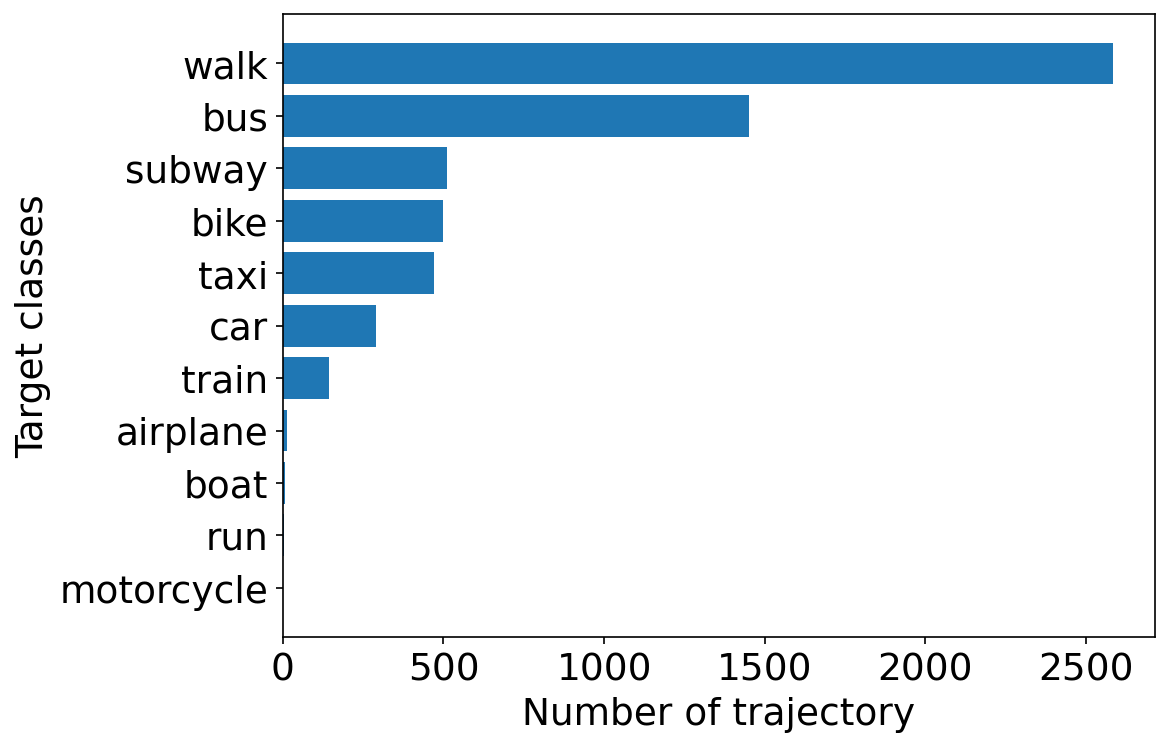

In [7]:
res = df.groupby("label").tid.nunique().sort_values()

plt.gcf().set_size_inches(7.5, 5.5)

plt.gcf().set_dpi(150)

plt.barh(res.index, res.to_list())


plt.xlabel("Number of trajectory", fontsize=18)
plt.ylabel("Target classes", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=18)

plt.savefig("geolife_classes.pdf", bbox_inches='tight')

plt.show()